# Importing Libraries


linear algebra

In [1]:
import numpy as np

data processing

In [2]:
import pandas as pd

data visualization

In [3]:
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style
%matplotlib inline

algorithms

In [4]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

# Getting Data

In [5]:
test_df=pd.read_csv("test.csv")
train_df=pd.read_csv("train.csv")

# Data exploration/Analysis

In [6]:
train_df.info()
#The training-set has 891 examples and 11 features + the target variable (survived). 
#2 of the features are floats, 5 are integers and 5 are objects

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


       Information of various features
survival:    Survival 
PassengerId: Unique Id of a passenger. 
pclass:    Ticket class     
sex:    Sex     
Age:    Age in years     
sibsp:    # of siblings / spouses aboard the Titanic     
parch:    # of parents / children aboard the Titanic     
ticket:    Ticket number     
fare:    Passenger fare     
cabin:    Cabin number     
embarked:    Port of Embarkation

In [7]:
train_df.describe()
#below we can see that 38% out of the training-set survived the Titanic. We can also see that the passenger ages range from
#0.4 to 80. On top of that we can already detect some features, that contain missing values, like the ‘Age’ feature.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [9]:
#we need to convert a lot of features into numeric ones later on, so that the machine learning algorithms can process them.
#Furthermore, we can see that the features have widely different ranges, that we will need to convert into roughly the same 
#scale. We can also spot some more features, that contain missing values (NaN = not a number), that we need to deal with.

let's take a more detailed look at what data is missing

In [10]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent1 = train_df.isnull().sum()/train_df.isnull().count() * 100
percent = (round(percent1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', '%'])
missing_data.head()

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0


In [11]:
#The Embarked feature has only 2 missing values, which can easily be filled. It will be much more tricky, to deal with the ‘Age’
#feature, which has 177 missing values. The ‘Cabin’ feature needs further investigation, but it looks like that we might want to
#drop it from the dataset, since 77 % of it are missing.

In [12]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [13]:
# it would make sense if everything except ‘PassengerId’, ‘Ticket’ and ‘Name’ would be correlated with a high survival rate.

1. Age and Sex

c:\users\sohal\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\sohal\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\sohal\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

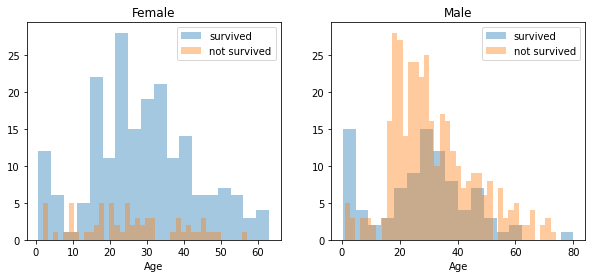

In [14]:
survived='survived'
not_survived='not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women= train_df[train_df['Sex']=='female']
men= train_df[train_df['Sex']=='male']
ax= sns.distplot(women[women['Survived']==1].Age.dropna(),bins=18,label=survived,ax=axes[0],kde=False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived,ax=axes[0],kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived,ax=axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax=axes[1],kde = False)
ax.legend()
_ = ax.set_title('Male')

2. Embarked, sex, pclass

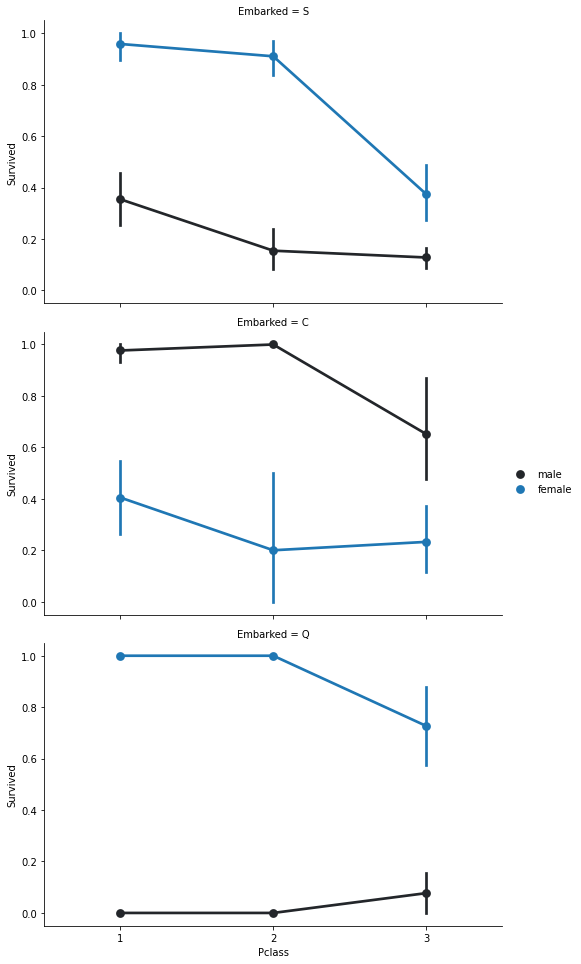

In [15]:
FacetGrid = sns.FacetGrid(train_df, row='Embarked', height=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

In [16]:
#Embarked seems to be correlated with survival, depending on the gender.
#Women on port Q and on port S have a higher chance of survival. The inverse is true, if they are at port C. 
#Men have a high survival probability if they are on port C, but a low probability if they are on port Q or S.
#Pclass also seems to be correlated with survival. We will generate another plot of it below.

3. Pclass

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

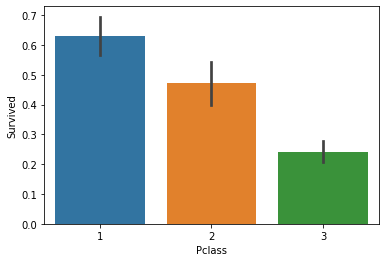

In [17]:
sns.barplot(x='Pclass',y='Survived',data=train_df)

In [18]:
#Here we see clearly, that Pclass is contributing to a persons chance of survival, especially if this person is in class 1.
#We will create another pclass plot below.

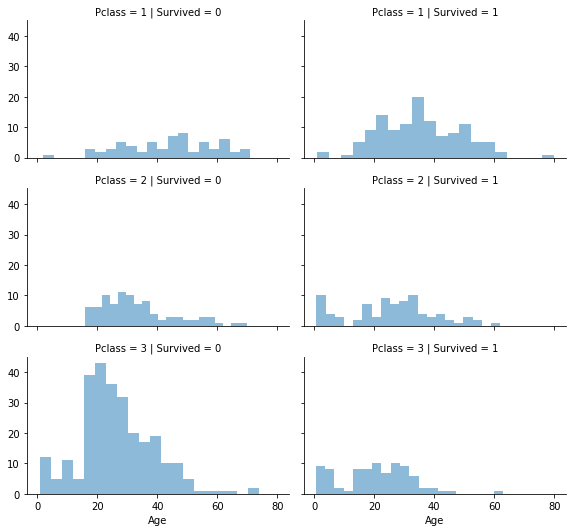

In [19]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', height=2.5, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

In [20]:
#The plot above confirms our assumption about pclass 1, but we can also spot a high probability that a person
#in pclass 3 will not survive.

4. SibSp and ParCh

In [21]:
#SibSp and Parch would make more sense as a combined feature, that shows the total number of relatives, a person has on the
#Titanic. I will create it below and also a feature that sows if someone is not alone.

In [22]:
data = [train_df, test_df]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
train_df['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

c:\users\sohal\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


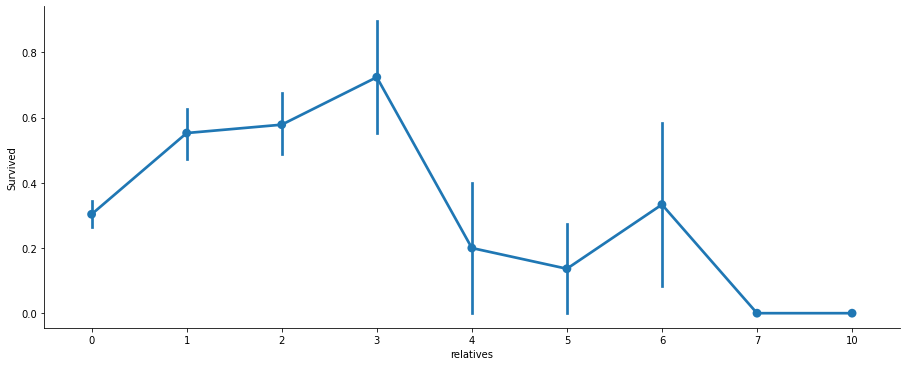

In [23]:
axes = sns.factorplot(x='relatives',y='Survived', data=train_df, aspect = 2.5, )

In [24]:
#Here we can see that you had a high probabilty of survival with 1 to 3 realitves, but a lower one if you had less than 1
#or more than 3 (except for some cases with 6 relatives).

# Data Processing

In [25]:
#First, I will drop ‘PassengerId’ from the train set, because it does not contribute to a persons survival probability.
#I will not drop it from the test set, since it is required there for the submission.

In [26]:
train_df=train_df.drop(['PassengerId'],axis=1)

MISSING DATA

First, I will drop ‘PassengerId’ from the train set, because it does not contribute to a persons survival probability. I will not drop it from the test set, since it is required there for the submission.

cabin

In [27]:
#A cabin number looks like ‘C123’ and the letter refers to the deck. Therefore we’re going to extract these and create a new
#feature, that contains a persons deck. Afterwords we will convert the feature into a numeric variable. The missing values will
#be converted to zero. 

In [28]:
import re
deck={"A":1,"B":2,"C":3,"D":4,"E":5,"F":6,"G":7,"U":8}
data=[train_df,test_df]
for dataset in data:
    dataset['Cabin']=dataset['Cabin'].fillna("U0")
    dataset['Deck']= dataset['Cabin'].map(lambda x: re.compile("([a-zA-z]+)").search(x).group())
    dataset['Deck']= dataset['Deck'].map(deck)
    dataset['Deck']= dataset['Deck'].fillna(0)
    dataset['Deck']=dataset['Deck'].astype(int)

In [29]:
#we can now drop the cabin feature

train_df=train_df.drop(['Cabin'],axis=1)
test_df=test_df.drop(['Cabin'],axis=1)

age

Now we can tackle the issue with the age features missing values. I will create an array that contains random numbers,
which are computed based on the mean age value in regards to the standard deviation and is_null.

In [30]:
data = [train_df,test_df]
for dataset in data:
    mean=train_df['Age'].mean()
    std=test_df['Age'].std()
    is_null=dataset['Age'].isnull().sum()

    # compute random numbers between mean , std, is_null
    rand_age=np.random.randint(mean-std, mean+std, size=is_null)

    # filling NaN values in age column with random values generated
    age_slice= dataset['Age'].copy()
    age_slice[np.isnan(age_slice)]=rand_age
    dataset['Age']=age_slice
    dataset['Age']=train_df['Age'].astype(int)

train_df['Age'].isnull().sum()

0

Embarked

since the embarked feature has only two values missing , we will fill it with the common value

In [31]:
train_df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [32]:
common_value='S'
data=[train_df,test_df]
for dataset in data:
    dataset['Embarked']=dataset['Embarked'].fillna(common_value)

CONVERTING FEATURES

In [33]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Name       891 non-null    object 
 3   Sex        891 non-null    object 
 4   Age        891 non-null    int32  
 5   SibSp      891 non-null    int64  
 6   Parch      891 non-null    int64  
 7   Ticket     891 non-null    object 
 8   Fare       891 non-null    float64
 9   Embarked   891 non-null    object 
 10  relatives  891 non-null    int64  
 11  not_alone  891 non-null    int32  
 12  Deck       891 non-null    int32  
dtypes: float64(1), int32(3), int64(5), object(4)
memory usage: 80.2+ KB


In [34]:
# ‘Fare’ is a float and we have to deal with 4 categorical features: Name, Sex, Ticket and Embarked.
# Lets investigate and transfrom one after another.

Fare

converting Fare from float to int using astype() in pandas

In [35]:
data=[train_df,test_df]

for dataset in data:
    dataset['Fare']=dataset['Fare'].fillna(0)
    dataset['Fare']=dataset['Fare'].astype(int)

Name

We will use the Name feature to extract the Titles from the Name, so that we can build a new feature out of that.

In [36]:
data=[train_df,test_df]
titles={'Mr':1,'Miss':2,'Mrs':3,'Master':4,'Rare':5}

for dataset in data:
    # extract titles
    dataset['Title']=dataset.Name.str.extract(' ([A-Za-z]+)\.',expand=False)
    # replace titiles as more common titles or as rare
    dataset['Title']=dataset['Title'].replace(['Lady','Countess','Capt','Col','Don','Dr','Major',
                                               'Rev','Sir','Jonkheer','Dona'],'Rare')
    dataset['Title']=dataset['Title'].replace('Mlle','Miss')
    dataset['Title']=dataset['Title'].replace('Ms','Miss')
    dataset['Title']=dataset['Title'].replace('Mme','Miss')
    # convert titles into  numbers
    dataset['Title']=dataset['Title'].map(titles)
    # filling Nan with 0 to be safe
    dataset['Title']=dataset['Title'].fillna(0)

train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)

Sex:


convert sex feature into numeric value

In [37]:
genders={'male':0,'female':1}
data=[train_df,test_df]

for dataset in data:
    dataset['Sex']=dataset['Sex'].map(genders)

Ticket:

In [38]:
train_df['Ticket'].describe()

count      891
unique     681
top       1601
freq         7
Name: Ticket, dtype: object

since ticket feature has 681 different values , it will be difficult to convert it , so we will drop it

In [39]:
train_df=train_df.drop(['Ticket'],axis=1)
test_df=test_df.drop(['Ticket'],axis=1)

Embarked:

In [40]:
ports={'S':0,'C':1,'Q':2}
data=[train_df,test_df]

for dataset in data:
    dataset['Embarked']=dataset['Embarked'].map(ports)

CREATING CATEGORIES

1.Age:

Now we need to convert the ‘age’ feature. First we will convert it from float into integer. 
Then we will create the new ‘AgeGroup” variable, by categorizing every age into a group.

In [41]:
data=[train_df,test_df]
for dataset in data:
    dataset['Age']=dataset['Age'].astype(int)
    dataset.loc[dataset['Age']<=11,'Age']=0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[dataset['Age'] > 66, 'Age'] = 7
train_df['Age'].value_counts()

4    165
6    152
5    143
3    141
2    121
1     94
0     68
7      7
Name: Age, dtype: int64

2. Fare:

For the ‘Fare’ feature, we need to do the same as with the ‘Age’ feature. But it isn’t that easy, because if we cut the range of the fare values into a few equally big categories, 80% of the values would fall into the first category. Fortunately, we can use sklearn “qcut()” function, that we can use to see, how we can form the categories.

In [42]:
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,0,2,1,0,7,0,1,0,8,1
1,1,1,1,5,1,0,71,1,1,0,3,3
2,1,3,1,3,0,0,7,0,0,1,8,2
3,1,1,1,5,1,0,53,0,1,0,3,3
4,0,3,0,5,0,0,8,0,0,1,8,1
5,0,3,0,1,0,0,8,2,0,1,8,1
6,0,1,0,6,0,0,51,0,0,1,5,1
7,0,3,0,0,3,1,21,0,4,0,8,4
8,1,3,1,3,0,2,11,0,2,0,8,3
9,1,2,1,1,1,0,30,1,1,0,8,3


In [43]:
pd.qcut(train_df['Fare'],q=6)
# just checking

0      (-0.001, 7.0]
1      (52.0, 512.0]
2      (-0.001, 7.0]
3      (52.0, 512.0]
4         (7.0, 8.0]
           ...      
886      (8.0, 14.0]
887     (26.0, 52.0]
888     (14.0, 26.0]
889     (26.0, 52.0]
890    (-0.001, 7.0]
Name: Fare, Length: 891, dtype: category
Categories (6, interval[float64]): [(-0.001, 7.0] < (7.0, 8.0] < (8.0, 14.0] < (14.0, 26.0] < (26.0, 52.0] < (52.0, 512.0]]

In [44]:
data=[train_df,test_df]

for dataset in data:
    dataset.loc[dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare'] = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare'] = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare'] = 4
    dataset.loc[dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

In [45]:
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,0,2,1,0,0,0,1,0,8,1
1,1,1,1,5,1,0,3,1,1,0,3,3
2,1,3,1,3,0,0,0,0,0,1,8,2
3,1,1,1,5,1,0,3,0,1,0,3,3
4,0,3,0,5,0,0,1,0,0,1,8,1
5,0,3,0,1,0,0,1,2,0,1,8,1
6,0,1,0,6,0,0,3,0,0,1,5,1
7,0,3,0,0,3,1,2,0,4,0,8,4
8,1,3,1,3,0,2,1,0,2,0,8,3
9,1,2,1,1,1,0,2,1,1,0,8,3


CREATING NEW FEATURES

I will add two new features to the dataset, that I compute out of other features.

1. Age Time class

In [46]:
data=[train_df,test_df]
for dataset in data:
    dataset['Age_Class']=dataset['Age']*dataset['Pclass']

2, Fare per person

In [47]:
for dataset in data:
    dataset['Fare_per_person']=dataset['Fare']/(dataset['relatives']+1)
    dataset['Fare_per_person']=dataset['Fare_per_person'].astype(int)

In [48]:
# let's take a look at training set before we start training models

In [49]:
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Age_Class,Fare_per_person
0,0,3,0,2,1,0,0,0,1,0,8,1,6,0
1,1,1,1,5,1,0,3,1,1,0,3,3,5,1
2,1,3,1,3,0,0,0,0,0,1,8,2,9,0
3,1,1,1,5,1,0,3,0,1,0,3,3,5,1
4,0,3,0,5,0,0,1,0,0,1,8,1,15,1
5,0,3,0,1,0,0,1,2,0,1,8,1,3,1
6,0,1,0,6,0,0,3,0,0,1,5,1,6,3
7,0,3,0,0,3,1,2,0,4,0,8,4,0,0
8,1,3,1,3,0,2,1,0,2,0,8,3,9,0
9,1,2,1,1,1,0,2,1,1,0,8,3,2,1


# Building Machine Learning Models

Now we will train several Machine Learning models and compare their results. Note that because the dataset does not provide labels for their testing-set, we need to use the predictions on the training set to compare the algorithms with each other. Later on, we will use cross validation.

In [50]:
x_train=train_df.drop('Survived',axis=1)
y_train=train_df['Survived']
x_test=test_df.drop('PassengerId',axis=1).copy()

Stochastic Gradient Descent (SGD):

In [51]:
sgd=linear_model.SGDClassifier(max_iter=5,tol=None)
sgd.fit(x_train,y_train)
y_pred=sgd.predict(x_test)
sgd.score(x_train,y_train)
acc_sgd=round(sgd.score(x_train,y_train)*100,2)

Random Forest:

In [52]:
random_forest=RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train,y_train)
y_pred=random_forest.predict(x_test)
random_forest.score(x_train,y_train)
acc_random_forest=round(random_forest.score(x_train,y_train)*100,2)

Logistic Regression

In [53]:
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)
acc_log=round(logreg.score(x_train,y_train)*100,2)

c:\users\sohal\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


K Nearest Neighbour (KNN):

In [54]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
acc_knn=round(knn.score(x_train,y_train)*100,2)

Gaussian Naive Bayes:

In [55]:
gaussian=GaussianNB()
gaussian.fit(x_train,y_train)
y_pred=gaussian.predict(x_test)
acc_gaussian=round(gaussian.score(x_train,y_train)*100,2)

Perceptron:

In [56]:
perceptron=Perceptron(max_iter=10)
perceptron.fit(x_train,y_train)
y_pred=perceptron.predict(x_test)
acc_perc=round(perceptron.score(x_train,y_train)*100,2)

c:\users\sohal\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


Linear Support Vector Machine (SVM):

In [57]:
svm=LinearSVC()
svm.fit(x_train,y_train)
y_pred=svm.predict(x_test)
acc_svm=round(svm.score(x_train,y_train)*100,2)

c:\users\sohal\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Decision Tree:

In [58]:
decision_tree=DecisionTreeClassifier()
decision_tree.fit(x_train,y_train)
y_pred=decision_tree.predict(x_test)
acc_decision_tree=round(decision_tree.score(x_train,y_train)*100,2)

# Which is the Best Model ?

In [59]:
results=pd.DataFrame({'model':['Support Vector Machine','KNN','Logistic Regression','Decision Tree',
                               'Gaussian Naive Bayes','Perceptron','Random Forest','Stochastic Gradient Descent'],
                      'score':[acc_svm,acc_knn,acc_log,acc_decision_tree,acc_gaussian,acc_perc,acc_random_forest,
                               acc_sgd]})
results=results.sort_values(by='score',ascending=False)
results=results.set_index('score')
results.head(9)

,model
score,
92.48,Decision Tree
92.48,Random Forest
86.08,KNN
81.93,Support Vector Machine
81.82,Logistic Regression
81.59,Perceptron
77.78,Gaussian Naive Bayes
72.95,Stochastic Gradient Descent


the Random Forest classifier goes on the first place. But first, let us check, how random-forest performs, when we use cross validation.

# K-Fold Cross Validation

K-Fold Cross Validation randomly splits the training data into K subsets called folds. Let’s image we would split our
data into 4 folds (K = 4). Our random forest model would be trained and evaluated 4 times, using a different fold for
evaluation everytime, while it would be trained on the remaining 3 folds.

The result of our K-Fold Cross Validation example would be an array that contains 4 different scores. We then need to
compute the mean and the standard deviation for these scores.

The code below perform K-Fold Cross Validation on our random forest model, using 10 folds (K = 10). Therefore it
outputs an array with 10 different scores.

In [60]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, x_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.75555556 0.84269663 0.74157303 0.80898876 0.85393258 0.83146067
 0.78651685 0.74157303 0.85393258 0.80898876]
Mean: 0.802521847690387
Standard Deviation: 0.042086514119211146


Our model has a average accuracy of 82% with a standard deviation of 4 %. The standard deviation shows us, how precise the estimates are .
This means in our case that the accuracy of our model can differ + — 4%.
I think the accuracy is still really good and since random forest is an easy to use model, we will try to increase it’s performance even further in the following section

# Feature Importance

 great quality of random forest is that they make it very easy to measure the relative importance of each feature. Sklearn measure a features importance by looking at how much the treee nodes, that use that feature, reduce impurity on average (across all trees in the forest). It computes this score automaticall for each feature after training and scales the results so that the sum of all importances is equal to 1.

In [61]:
importances=pd.DataFrame({'feature':x_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances=importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
Title,0.210
Sex,0.161
Age_Class,0.102
Deck,0.084
Age,0.073
Fare,0.072
Pclass,0.071
relatives,0.059
Embarked,0.052


<AxesSubplot:xlabel='feature'>

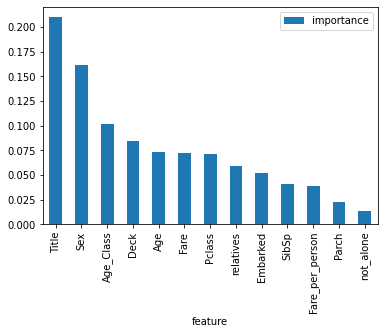

In [62]:
importances.plot.bar()

In [63]:
#not_alone and Parch doesn’t play a significant role in our random forest classifiers prediction process.
#Because of that I will drop them from the dataset and train the classifier again. We could also remove more or less features,
#but this would need a more detailed investigation of the features effect on our model. But I think it’s just fine to remove 
#only Alone and Parch.

In [64]:
train_df=train_df.drop('Parch',axis=1)
train_df=train_df.drop('not_alone',axis=1)
test_df=test_df.drop('Parch',axis=1)
test_df=test_df.drop('not_alone',axis=1)

training random Forest again

In [65]:
random_forest=RandomForestClassifier(n_estimators=100,oob_score=True)
random_forest.fit(x_train,y_train)
y_pred=random_forest.predict(x_test)
random_forest.score(x_train,y_train)
acc_random_forest=round(random_forest.score(x_train,y_train)*100,2)
print(round(acc_random_forest,2),"%")

92.48 %


In [66]:
#Our random forest model predicts as good as it did before. A general rule is that, the more features you have, the more likely
#your model will suffer from overfitting and vice versa. But I think our data looks fine for now and hasn't too much features.

In [67]:
print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 80.02 %


In [69]:
test_df.head(20)

,PassengerId,Pclass,Sex,Age,SibSp,Fare,Embarked,relatives,Deck,Title,Age_Class,Fare_per_person
0,892,3,0,2,0,0,2,0,8,1,6,0
1,893,3,1,5,1,0,0,1,8,3,15,0
2,894,2,0,3,0,1,2,0,8,1,6,1
3,895,3,0,5,0,1,0,0,8,1,15,1
4,896,3,1,5,1,1,0,2,8,3,15,0
5,897,3,0,1,0,1,0,0,8,1,3,1
6,898,3,1,6,0,0,2,0,8,2,18,0
7,899,2,0,0,1,2,0,2,8,1,0,0
8,900,3,1,3,0,0,1,0,8,3,9,0
9,901,3,0,1,2,2,0,2,8,1,3,0


In [70]:
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [79]:
final_df=pd.DataFrame({'PassengerId':test_df['PassengerId'],'Survived':y_pred})
final_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [81]:
final_df.to_csv('final1.csv',index=False)

# Hyperparameter tuning

In [83]:
#param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10, 25, 50, 70],
#              "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], "n_estimators": [100, 400, 700, 1000, 1500]}
#from sklearn.model_selection import GridSearchCV, cross_val_score
#rf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)
#clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)
#clf.fit(x_train, y_train)
#clf.bestparams